In [5]:
import os
import sys
import json
#import math
import matplotlib.pyplot as plt
import numpy as np
# in order to recognize the utils, I had to add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

from CFDs.CFDs_pipeline import *
from utils.FAIR_DB_utils import *
#used for saving plots!
output_dir = os.path.join(project_root, "plots")


In [6]:
config_path_CFD = os.path.join(project_root, 'configs', 'CFD_config.json')


with open(config_path_CFD, 'r') as f:
     config_CFD = json.load(f)


protected_attributes = config_CFD["CFDParsing"]["protected_attributes"]
target_attribute = config_CFD["CFDParsing"]["target_attribute"]

In [ ]:
#------------------------------FIX IT LATER---------------------------------------
#THE PROBLEM is taht I'm moving the code from .ipynb to .py and did not implemented the dict_cfds,.. in that file yet!

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df3= createTable(dict_cfds, cleaned_data_for_cfd, protected_attributes, target_attribute)

NameError: name 'dict_cfds' is not defined

In [ ]:
minDiff = 0.07
#To select the not ethical rules
df4 = df3[df3.Diff > minDiff]
print("Total number of tuples in dataframe: " ,len(df4))
df4.head(13)

Total number of tuples in dataframe:  13


,Rule,Support,Confidence,Diff,sexDiff,raceDiff
0,"{'lhs': {'sex': 'female'}, 'rhs': {'income': '<=50k'}}",0.294526,0.890448,0.131374,0.131374,NaN
1,"{'lhs': {'native-country': 'united-states', 'sex': 'female'}, 'rhs': {'income': '<=50k'}}",0.264437,0.889210,0.135120,0.135120,NaN
6,"{'lhs': {'sex': 'female', 'education-degree': 'Assoc'}, 'rhs': {'income': '<=50k'}}",0.093371,0.920048,0.121687,0.121687,NaN
7,"{'lhs': {'education-degree': 'HS-College', 'sex': 'female'}, 'rhs': {'income': '<=50k'}}",0.101484,0.934881,0.091100,0.091100,NaN
11,"{'lhs': {'hours-per-week_range': '21-40', 'sex': 'female'}, 'rhs': {'income': '<=50k'}}",0.207641,0.903934,0.093034,0.093034,NaN
17,"{'lhs': {'race': 'black'}, 'rhs': {'income': '<=50k'}}",0.084058,0.876041,0.116967,NaN,0.116967
19,"{'lhs': {'native-country': 'united-states', 'race': 'black'}, 'rhs': {'income': '<=50k'}}",0.076221,0.876016,0.121925,NaN,0.121925
24,"{'lhs': {'education-degree': 'HS-College', 'race': 'black'}, 'rhs': {'income': '<=50k'}}",0.035406,0.926790,0.083009,NaN,0.083009
32,"{'lhs': {'hours-per-week_range': '21-40', 'race': 'black'}, 'rhs': {'income': '<=50k'}}",0.066079,0.895833,0.084933,NaN,0.084933
42,"{'lhs': {'race': 'black', 'sex': 'female'}, 'rhs': {'income': '<=50k'}}",0.045026,0.942122,0.183048,0.066081,0.051674


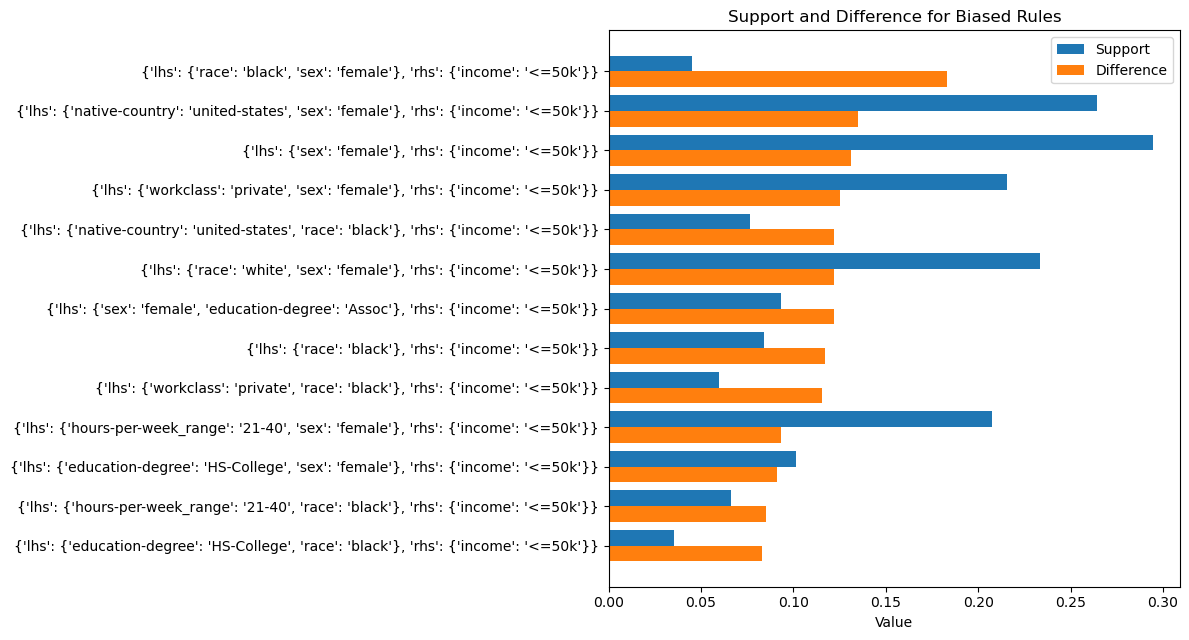

In [ ]:
# A Grouped Bar Chart for better visualization.


# Sort the DataFrame in descending order by 'Diff' value
df_sorted = df4.sort_values(by='Diff', ascending=False).reset_index(drop=True)


#create y positions for each rule
y = np.arange(len(df_sorted))
bar_height = 0.4


# Increase figure height to accommodate long labels
fig, ax = plt.subplots(figsize=(12, max(6, len(df_sorted)*0.5)))


# plot horizontal bars for Support and Difference
ax.barh(y - bar_height/2, df_sorted['Support'], height=bar_height, label='Support')
ax.barh(y + bar_height/2, df_sorted['Diff'], height=bar_height, label='Difference')


# Put the full rule text as y-axis label
ax.set_yticks(y)
ax.set_yticklabels(df_sorted['Rule'].apply(lambda x: str(x)), fontsize=10)


ax.invert_yaxis()  # Highest Diff on top
ax.set_xlabel('Value')
ax.set_title('Support and Difference for Biased Rules')
ax.legend()


plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Support_and_Difference_for_Biased_Rules.png"))
plt.show()
plt.close()
